# Metodos Numericos - Laboratorio 2
Grupo 9

Presentado por:

Juan Diego Rozo Álvarez - Universidad Nacional de Colombia

Daniel Felipe Castro Galindo - Universidad Nacional de Colombia

Juan Pablo Gómez Cristancho - Universidad Nacional de Colombia

---


En este laboratorio se hará uso de métodos numericos, tal como el metodo de la **Factorización Triangular** o **Iteración de Jacobi**, para la solucion exacta y aproximada de un sistema de ecuaciones de la forma AX=B, respectivamente.

La implementación de estos metodos será realizada en su totalidad haciendo el uso en Python.

A continuación se explica la estructura del documento en Collab.


*   Definicion de librerias.
*   Definicion de **getTabla** para imprimir los datos almacenados (usado para Jacobi).
*   Definicion del método de la **Factorización Triangular y derivados**.
*   Implementacion del método **factorizacionTriangular(args) y sus derivados**.
*   Definicion del **Iteración de Jacobi y derivados**.
*   Implementacion del metodo **jacobi(args) y derivados**.  

# Definición de librerías
blablabla

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

# Definición de getTabla
---


`getTabla(args)` es una función de autoria propia del grupo, la cual ayuda a almacenar los datos recopilados de un metodo en formato de un diccionario en Python. La razon por la cual se realiza esta implementacion se debe a dos factores:


1.   **Legibilidad:** Al usar un diccionario, se puede puede representar cada columna de información como una llave con un nombre intuitivo la cual tiene relacionado un valor del tipo Lista, en lugar de usar una lista de listas, lo cual hace que el codigo sea ilegible el código.
2.   **Complejidad algorítmica:** Al ser un diccionario, la búsqueda de una llave es siempre **O(1)**, dada la naturaleza de la estructura Hash.

A continuación, se muestrá el codigo de `getTabla(args)`

In [ ]:
def getTabla(heads_data,setTitle="",character=" "):
    '''

    Genera una tabla en formato de texto a partir de un diccionario de listas.

    Args:
        heads_data (dict): Llaves como encabezados y listas como columnas de datos.
        setTitle (str): Titulo de la tabla (opcional).
        character (str): Caracter de relleno para alinear texto (opcional).

    Returns:
        str: Representacion en string de la tabla formateada.

    Variables:
        table (str): Acumulador de texto para construir la tabla final.
        long_elements_x (dict): Guarda el ancho maximo necesario para cada columna.
        first_head (str): Primera llave del diccionario, usada para conocer el numero de filas.
        long_tabla_y (int): Altura de la tabla (numero de filas).
        long_tabla_x (int): Ancho total de la tabla (sumatoria de anchos de columnas).
        enmarcate (int): Ancho total de la tabla con bordes, usado para formatear y centrar.


    Nota:
        Todas las listas deben tener la misma longitud para evitar errores.


    '''
    table=""
    long_elements_x=dict()
    first_head=next(iter(heads_data))
    long_tabla_y=len(heads_data[first_head])


    if (long_tabla_y==0):
        return "Tabla sin datos"

    if len(character)>1: #si character son varios digitos, agarra el primero
        character=character[:1]

    for head in heads_data:
        # Este for consigue los mayores anchos necesarios para cada columna de la tabla, para mantener un formato
        long_element_x=max(map(str,heads_data[head]),key=len)
        long_head=len(head)
        long_data=len(long_element_x)
        long_elements_x[head]=max(long_head,long_data)

    long_tabla_x=sum(long_elements_x.values())
    enmarcate=long_tabla_x+2*len(heads_data)+len(heads_data)+1
    title=setTitle.center(enmarcate)

    table +="\n"+title+"\n"+"="*enmarcate+"\n"+"|"

    for head in heads_data:
        # Este for carga los encabezados del diccionario a la tabla
        tabulate=long_elements_x[head]
        text_head=str(head).center(tabulate,character)
        table+=" "+text_head+" |"

    table+="\n"+"="*enmarcate+"\n"

    for i in range(long_tabla_y):
        # Este for carga los datos obtenidos a la tabla
        table+="|"
        for head in heads_data:
            tabulate=long_elements_x[head]
            text_data=str(heads_data[head][i]).center(tabulate,character)
            table+=" "+text_data+" |"
        table+="\n"

    table+="="*enmarcate
    return table

# Definición del método de la Factorización Triangular y sus derivados
---
blablabla

In [12]:
def has_unique_solutions(matrix):
    """
    Verifica si una matriz cuadrada tiene solución única para el sistema Ax = B.

    Args:
        matrix (np.ndarray): Matriz de coeficientes (forma n x n).

    Returns:
        bool: True si la matriz es cuadrada e invertible (det ≠ 0), False en caso contrario.
    """

    if not isinstance(matrix, np.ndarray):
        raise TypeError("Matriz mal escrita - (necesita ser un objeto np.ndarray)")

    is_square=matrix.shape[0]==matrix.shape[1]
    if not is_square:
        return False
    if np.isclose(np.linalg.det(matrix),0):
        return False
    return True


def sustitucionRegresiva(matrix,independent):
    """
    Resuelve un sistema de ecuaciones lineales con matriz triangular superior mediante sustitución regresiva.

    Args:
        matrix (np.ndarray): Matriz triangular superior de coeficientes (forma n x n).
        independent (np.ndarray): Vector columna de términos independientes (forma n,).

    Returns:
        list: Lista con la solución del sistema (forma n,).
    """
    is_uptriangular=np.allclose(matrix, np.triu(matrix))

    if not is_uptriangular: # verifica que la matriz sea triangular superior
        raise ValueError("La matriz no es triangular superior")

    n_dim=matrix.shape[0]
    solutions=[0.0]*n_dim #no se usa insert para mejorar eficiencia. Usaremos acceso directo a memoria

    xn=independent[-1]/matrix[-1,-1]
    solutions[-1]=xn

    for i in range(n_dim-2,-1,-1): #se recorre desde n-1 hasta 0 (recordar que empieza con indice cero, por eso n_dim-2 --> ndim-1-1)
        x_i=(independent[i]-(np.dot(matrix[i,i+1:],solutions[i+1:])))/matrix[i,i]
        solutions[i]=x_i
    return solutions


def sustitucionProgresiva(matrix, independent):
    """
    Resuelve un sistema de ecuaciones lineales con matriz triangular inferior mediante sustitución progresiva.

    Args:
        matrix (np.ndarray): Matriz triangular inferior de coeficientes (forma n x n).
        independent (np.ndarray): Vector columna de términos independientes (forma n,).

    Returns:
        list: Lista con la solución del sistema (forma n,).
    """
    is_lowtriangular=np.allclose(matrix, np.tril(matrix))

    if not is_lowtriangular: # verifica que la matriz sea triangular inferior
        raise ValueError("La matriz no es triangular inferior")

    n_dim=matrix.shape[0]
    solutions=[0.0]*n_dim # no se usa insert para mejorar eficiencia. Usaremos acceso directo a memoria
    xn=independent[0]/matrix[0,0]
    solutions[0]=xn

    for i in range(1,n_dim): #se recorre desde 1 hasta n
        x_i=(independent[i]-(np.dot(matrix[i,:i],solutions[:i])))/matrix[i,i]
        solutions[i]=x_i
    return solutions


def factorizacionLU(matrix):
    """
    Realiza la factorización LU sin pivoteo de una matriz cuadrada A.

    Args:
        matrix (np.ndarray): Matriz cuadrada.

    Returns:
        tuple: (L, U) donde A = LU.

    Raises:
        ValueError: Si se detecta un pivote cero (requiere pivoteo).
        TypeError: Si la matriz no es un objeto np.ndarray.
        bool: Retorna False si la matriz no es cuadrada o no tiene solución única.
    """
    if not has_unique_solutions(matrix):
        raise ValueError("La matriz ingresada no es válida (debe tener única solución)")

    U_matrix=matrix.copy()
    n_dim=U_matrix.shape[0] # dimension filas
    L_matrix=np.eye(n_dim)

    for j in range(0,n_dim):
        for i in range(j+1,n_dim):

            if np.isclose(U_matrix[j, j], 0):
                raise ValueError(f"Pivote cero detectado en fila {j}. Requiere pivoteo.\n{U_matrix}")

            m_ij=U_matrix[i,j]/U_matrix[j,j] # multiplicador
            U_matrix[i]=U_matrix[i]-m_ij*U_matrix[j] # se opera la fila de la matriz actual con la fila j
            L_matrix[i,j]=m_ij # se guarda el multiplicador en L

    return L_matrix, U_matrix



def resolve_AluMatrix(matrix, independent):
    """
    Resuelve el sistema AX = B usando factorización LU sin pivoteo (directa).

    Args:
        matrix (np.ndarray): Matriz de coeficientes A NxN.
        independent (np.ndarray): Vector columna B 1xN.

    Returns:
        np.ndarray: Solución X del sistema AX = B.
    """

    L_matrix, U_matrix = factorizacionLU(matrix)

    y_vector=sustitucionProgresiva(L_matrix,independent) # LY=B
    x_vector=sustitucionRegresiva(U_matrix,y_vector) # UX = Y

    return x_vector





def graphic_system(matrix,independent,x_vector):
    """
    Grafica sistemas de ecuaciones lineales con solución única para dimensiones 2x2 o 3x3.

    Args:
        matrix (np.ndarray): Matriz de coeficientes A (2x2 o 3x3).
        independent (np.ndarray): Vector de términos independientes B.
        x_vector (list or np.ndarray): Solución del sistema AX = B.

    Nota:
        - En 2D grafica rectas.
        - En 3D grafica planos.
        - Muestra el punto de intersección si existe.
    """
    dimension=matrix.shape[0]

    if dimension==2:
        plt.figure(figsize=(12, 8))
        x=np.linspace(x_vector[0]-100,x_vector[0]+100,400)

        for i in range(2):
            a1=matrix[i,0]
            a2=matrix[i,1]
            b=independent[i]

            if np.isclose(a2,0): # si la recta es vertical
                y=np.full_like(x,np.nan)
                x_vertical=b/a1
                plt.axvline(x_vertical,color='green')
            else:
                y=(b-a1*x)/a2 # se obtienen todas las imagenes para todas las rectas
            plt.plot(x,y, label=f"Ec{i+1}: {a1}*x + ({a2})*y = {b}") # se dibuja la recta

        if x_vector: # se dibuja el punto solución si se pasa como argumento
            plt.scatter(x_vector[0],x_vector[1],color="red",label=f"Punto de corte: ({x_vector[0]:.1f},{x_vector[1]:.1f})" )

        # se ajustan detalles de la grafica
        plt.axhline(0,color='black',linewidth=1)
        plt.axvline(0,color='black',linewidth=1)
        plt.grid(True)
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("y")
        plt.tight_layout()
        plt.show()

    elif dimension == 3:
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        for i in range(3):
            a, b, c = matrix[i]
            d = independent[i]

            if np.isclose(c, 0):  # plano vertical (no depende de z)
                x_vals = np.linspace(x_vector[0] - 10, x_vector[0] + 10, 30)
                z_vals = np.linspace(x_vector[2] - 10, x_vector[2] + 10, 30)
                X, Z = np.meshgrid(x_vals, z_vals)
                if not np.isclose(b, 0):  # evitar división por cero
                    Y = (d - a * X) / b
                    ax.plot_surface(X, Y, Z, alpha=0.5, label=f"Ecuación {i+1}", cmap='viridis')
                else:
                    print(f"No se puede graficar el plano {i+1}: a={a}, b={b}, c={c}")
            else:
                x_vals = np.linspace(x_vector[0] - 10, x_vector[0] + 10, 30) # depende de z
                y_vals = np.linspace(x_vector[1] - 10, x_vector[1] + 10, 30)
                X, Y = np.meshgrid(x_vals, y_vals)
                Z = (d - a * X - b * Y) / c
                ax.plot_surface(X, Y, Z, alpha=0.5, label=f"Ec{i+1}: {a}*x + ({b})*y + ({c}) = {d}", cmap='viridis')

        if x_vector: # se dibuja el punto solución si se pasa como argumento
            ax.scatter(*x_vector, color='red', label=f'Solución ({x_vector[0]:.1f}, {x_vector[1]:.1f}, {x_vector[2]:.1f})')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        ax.set_title('Sistema de Ecuaciones Lineales (3x3)')
        ax.grid(True)
        plt.legend()
        plt.show()

    else:
        print(f"(Gráfica no disponible para dimensión {dimension})")






mas texto por aquí

# Construcción del main para el método de la Factorización Triangular
---
blablabla

In [13]:
def user_input():
    title="="*69 + "\nMétodo para resolver sistemas de ecuaciones lineales de la forma AX=B\n" + "="*69 + "\n"
    subtitle1="\nIngrese la dimensión de la matriz cuadrada A\nEj: Dimension = 3\n"
    subtitle2="\nIngrese los coeficientes de la matriz A por filas, separados por espacios\n(la matriz A debe ser cuadrada)\n\nEj:\nF1 = 2 9 1\nF2 = 5 3 7\nF3 = 8 1 0\n"
    subtitle3="\nIngrese los valores del vector B (términos independientes), separados por espacios\nEj: B = 1 2 3\n"

    print(title, subtitle1)

    while True:
        try:
            dimension=int(input(">> Dimension = "))
            if dimension <= 0:
                raise ValueError("La dimensión debe ser un entero positivo.")
            break
        except ValueError:
            print("Entrada inválida. Ingrese un número entero positivo.\n")

    print(subtitle2)

    while True:
        matriz=[]
        try:
            for i in range(dimension):
                fila = input(f">> F{i+1} = ")
                fila_valores = list(map(float, fila.strip().split()))
                if len(fila_valores) != dimension:
                    raise ValueError()
                matriz.append(fila_valores)

            matriz_np = np.array(matriz)

            if has_unique_solutions(matriz_np):
                break
            else:
                print("Esta matriz no tiene solución única. Intente con otra.\n")
        except ValueError:
            print(f"Error: Cada fila debe tener exactamente {dimension} números válidos.\n")
        except Exception as e:
            print(f"Error inesperado: {e}\n")

    print(subtitle3)

    while True:
        try:
            b_input = input(">> B = ")
            b_vector = list(map(float, b_input.strip().split()))
            if len(b_vector) != dimension:
                raise ValueError()
            b_np = np.array(b_vector)
            break
        except ValueError:
            print(f" El vector B debe tener exactamente {dimension} elementos numéricos. Intente de nuevo.\n")

    return matriz_np, b_np


def ALUmain(matrix=[], independent=[], console_input=False):
    if console_input:
        matrix, independent = user_input()
    try:
        init=time.perf_counter()
        solucion = resolve_AluMatrix(matrix, independent)
        end=time.perf_counter()
        print("\nSolución del sistema AX = B:")
        for i, x in enumerate(solucion):
            print(f"x{i+1} = {x}")
    except Exception as e:
        print(f"\nError al resolver el sistema: {e}")

    print(f"\nTiempo de ejecución: {end-init}\n")
    graphic_system(matrix,independent,solucion)



A continuación, se presenta el funcionamiento del metodo de la Factorización Triangular programado en Python, esto mediante la ejecucion de la funcion `factorizacionTriangular_main()`.

> **Nota:** *es importante poner los datos de entrada en el formato especificado por el programa; de lo contrario, dará error.*

In [14]:
ALUmain(console_input=True)

Método para resolver sistemas de ecuaciones lineales de la forma AX=B
 
Ingrese la dimensión de la matriz cuadrada A
Ej: Dimension = 3

>> Dimension = 4

Ingrese los coeficientes de la matriz A por filas, separados por espacios
(la matriz A debe ser cuadrada)

Ej:
F1 = 2 9 1
F2 = 5 3 7
F3 = 8 1 0

>> F1 = 1 2 4 1
>> F2 = 2 8 6 4
>> F3 = 3 10 8 8
>> F4 = 4 12 10 6

Ingrese los valores del vector B (términos independientes), separados por espacios
Ej: B = 1 2 3

>> B = 21 52 79 82

Solución del sistema AX = B:
x1 = 1.0
x2 = 2.0
x3 = 3.0
x4 = 4.0

Tiempo de ejecución: 0.000613179000083619

(Gráfica no disponible para dimensión 4)



Solución del sistema AX = B:
x1 = 2.25
x2 = 2.5

Tiempo de ejecución: 0.0006373039998379681



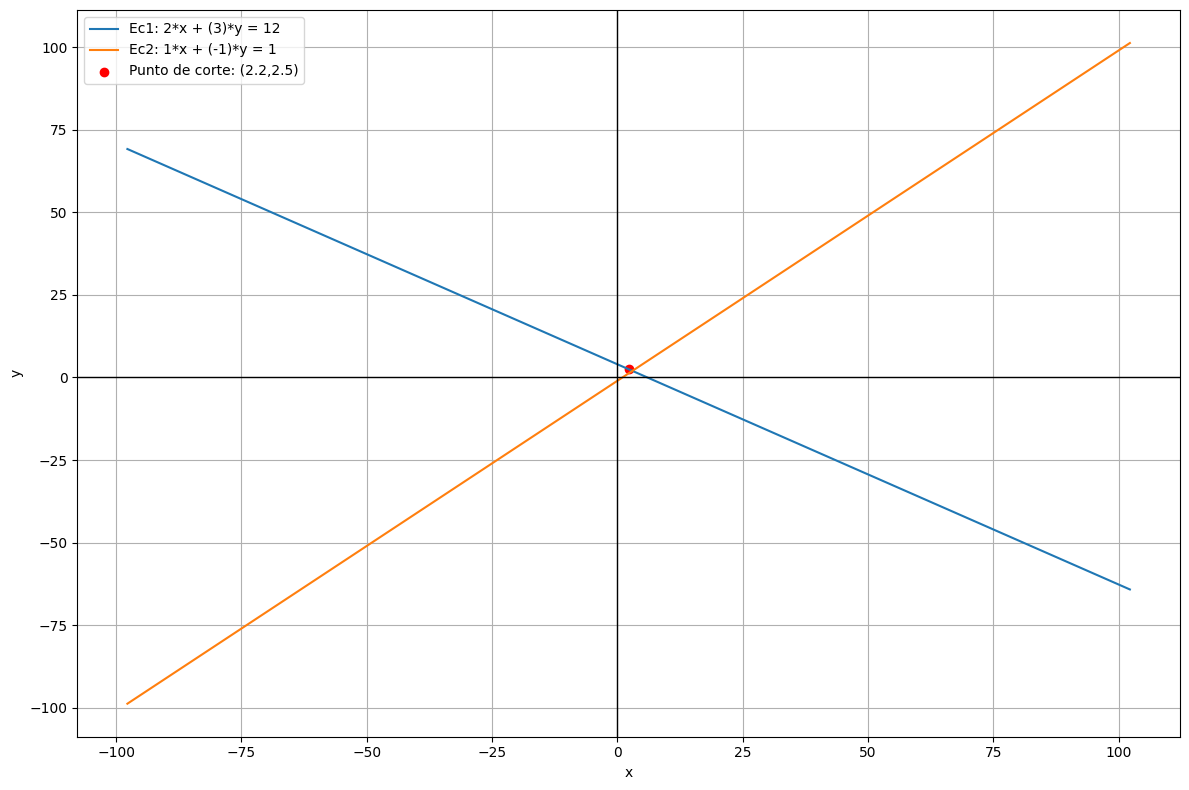

In [18]:
A_2=np.array([[2,3],[1,-1]])
b_2=np.array([12,1])
ALUmain(A_2,b_2, console_input=False)


Solución del sistema AX = B:
x1 = 1.1271111111111112
x2 = 2.56
x3 = -1.3555555555555554

Tiempo de ejecución: 0.0006740500000432803



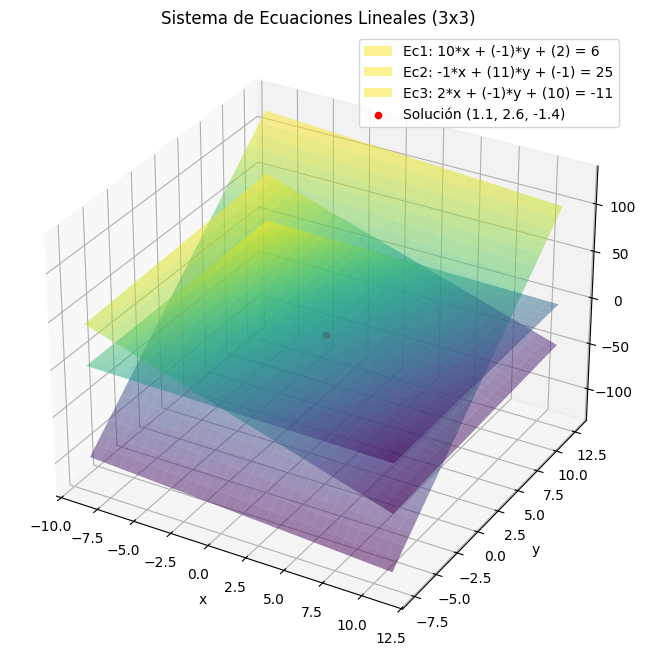

In [21]:
A_3=np.array([[10, -1, 2],
              [-1, 11, -1],
              [2, -1, 10],])
b_3=np.array([6, 25, -11])

ALUmain(A_3,b_3, console_input=False)

# Definición del método de Jacobi
---
etc.

In [ ]:
def codigo_necesario():
  pass

texto explicativo aqui

# Construcción del main para el método de Jacobi
---
mas texto...

In [ ]:
def jacobi_main():
  pass

A continuación, se presenta el funcionamiento del metodo de Jacobi programado en Python, esto mediante la ejecucion de la funcion `jacobi_main()`.

> **Nota:** *es importante poner los datos de entrada en el formato especificado por el programa; de lo contrario, dará error.*

In [ ]:
jacobi_main()